#### CSCI 347
#### Project 3
#### Names: Moiyad Alfawwar, Michael Roduin, Philip Ghede

## Problem 1: Think about the data

Paragraph here.

## Part 2: Write Python code for clustering

In [1]:
# libraries
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
import math
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
import pandas as pd

## Part 3: Analyze your data

1. (4 points) Use sklearn’s PCA implementation to linearly transform the data to two dimensions.
Create a scatter plot of the data, with the x-axis corresponding to coordinates of the data
along the first principal component, and the y-axis corresponding to coordinates of the data
along the second principal component. Does it look like there are clusters in these two
dimensions? If so, how many would you say there are?

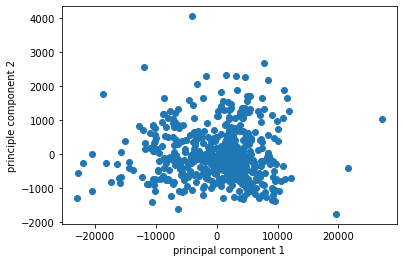

In [2]:
Data = np.genfromtxt('data/water-treatment.data', delimiter=",")
pca = PCA(n_components=2)
Data2 = np.delete(Data, [0],1)
D3 = pd.DataFrame(Data2)
D3 = D3.fillna(method='ffill')
D3 = D3.fillna(method='bfill')
D3.isnull().sum()
D3 = D3.to_numpy()
# D3 = Data2[:, ~np.isnan(Data2).any(axis=0)]
pca_data = pca.fit_transform(D3)
# Data2
pca_data
plt.scatter(pca_data[:,0],pca_data[:,1])
plt.xlabel('principal component 1')
plt.ylabel('principle component 2')
plt.show()

2. (3 points) Use sklearn’s PCA implementation to linearly transform the data, without spec-
ifying the number of components to use. Create a plot with r, the number of components
(i.e., dimensionality), on the x-axis, and f (r), the fraction of total variance captured in the
first r principal components, on the y-axis. Based on this plot, choose a number of principal
components to reduce the dimensionality of the data. Report how many principal components
will be used as well as the faction of total variance captured using this many components.

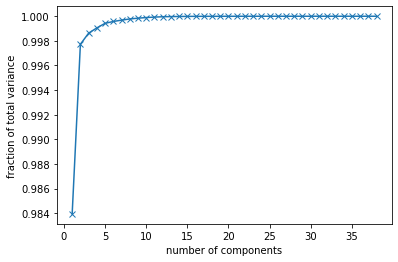

The explained variance using two principal components:  0.9977245150851312


In [3]:
pca2 = PCA()
pca_data2 = pca2.fit_transform(D3)

explained_variance=pca2.explained_variance_ratio_[0]+pca2.explained_variance_ratio_[1]
plt.plot(range(1,39),np.cumsum(pca2.explained_variance_ratio_), marker='x')
plt.xlabel('number of components')
plt.ylabel('fraction of total variance')
plt.show()

print("The explained variance using two principal components: ", explained_variance)

3. (5 points) For both the original and the reduced-dimensionality data obtained using PCA in
question 3.2, do the following: Experiment with a range of values for the number of clusters,
k, that you pass as input to the k-means function, to find clusters in the chosen data set. Use
at least 5 different values of k. For each value of k, report the value of the objective function
for that choice of k.

Objective function result of 3 clusters:  5236701736.875474


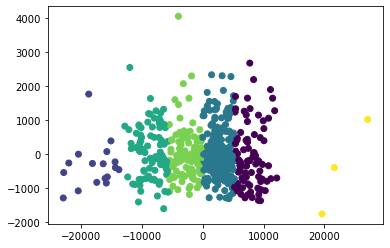

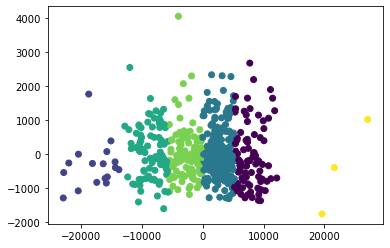

Objective function result of 6 clusters:  1831174016.1470501
Objective function result of 8 clusters:  1131607953.0024855
Objective function result of 10 clusters:  849288910.5025187
Objective function result of 15 clusters:  559585010.4365393


In [50]:
kmeans1 = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans2 = KMeans(n_clusters=6, init='k-means++', max_iter=300, random_state=0)
kmeans3 = KMeans(n_clusters=8, init='k-means++', max_iter=300, random_state=0)
kmeans4 = KMeans(n_clusters=10, init='k-means++', max_iter=300, random_state=0)
kmeans5 = KMeans(n_clusters=15, init='k-means++', max_iter=300, random_state=0)


pred_labels1 = kmeans1.fit_predict(D3)
pred_labels_pca1 = kmeans1.fit_predict(pca_data2)
pred_labels2 = kmeans2.fit_predict(D3)
pred_labels_pca2 = kmeans2.fit_predict(pca_data2)
pred_labels3 = kmeans3.fit_predict(D3)
pred_labels_pca3 = kmeans3.fit_predict(pca_data2)
pred_labels4 = kmeans4.fit_predict(D3)
pred_labels_pca4 = kmeans4.fit_predict(pca_data2)
pred_labels5 = kmeans5.fit_predict(D3)
pred_labels_pca5 = kmeans5.fit_predict(pca_data2)
pred_labels1[:300]
pred_labels_pca1[:100]

pred_labels_pca5[:100]

print("Objective function result of 3 clusters: ", kmeans1.inertia_)
plt.scatter(pca_data[:,0],pca_data[:,1], c=pred_labels2)
plt.show()
plt.scatter(pca_data[:,0],pca_data[:,1], c=pred_labels_pca2)
plt.show()
print("Objective function result of 6 clusters: ", kmeans2.inertia_)
print("Objective function result of 8 clusters: ", kmeans3.inertia_)
print("Objective function result of 10 clusters: ", kmeans4.inertia_)
print("Objective function result of 15 clusters: ", kmeans5.inertia_)

4. (5 points) For both the original and the reduced-dimensionality data obtained using PCA in
question 3.2, do the following: Experiment with a range of values for the minpts and $\epsilon$ input
parameters to the DBSCAN function to find clusters in the chosen data set. First, keep $\epsilon$
fixed and try out a range of different values for minpts. Then keep minpts fixed, and try a
range of values for $\epsilon$. Use at least 5 values of $\epsilon$ and at least 5 values of minpts. Report the
number of clusters found for each (minpts, $\epsilon$) pair tested.

In [127]:
# Minsamples
dbs1 = DBSCAN(eps=500, min_samples=3)
dbs2 = DBSCAN(eps=500, min_samples=4)
dbs3 = DBSCAN(eps=500, min_samples=5)
dbs4 = DBSCAN(eps=500, min_samples=6)
dbs5 = DBSCAN(eps=500, min_samples=7)


# Eps
dbs_e1 = DBSCAN(eps=275, min_samples=5)
dbs_e2 = DBSCAN(eps=299, min_samples=5)
dbs_e3 = DBSCAN(eps=300, min_samples=5)
dbs_e4 = DBSCAN(eps=425, min_samples=5)
dbs_e5 = DBSCAN(eps=500, min_samples=5)

- #### Minsamples

Original Data's Number of Clusters at min_samples=3: 11
PCA Data's Number of Clusters at min_samples=3: 11


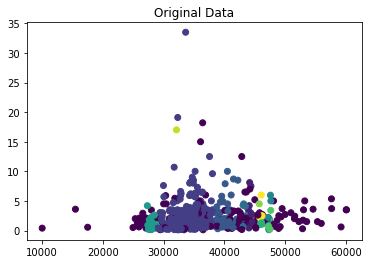

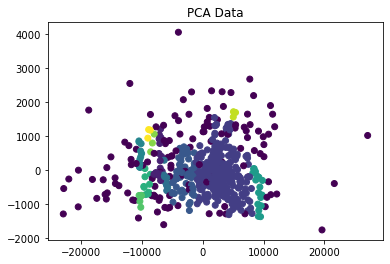

In [158]:
# dbs_e1 = DBSCAN(eps=290, min_samples=5)
# Min samples 3
dbs1 = DBSCAN(eps=500, min_samples=3)
dbs1_labels = dbs1.fit_predict(D3)
print("Original Data's Number of Clusters at min_samples=3:" , max(dbs1_labels)+1)
pca1_labels = dbs1.fit_predict(pca_data2)
print("PCA Data's Number of Clusters at min_samples=3:" , max(pca1_labels)+1)

plt.scatter(D3[:,0], D3[:,1],c=dbs1_labels)
plt.title("Original Data")
plt.show()

plt.scatter(pca_data2[:,0], pca_data2[:,1],c=pca1_labels)
plt.title("PCA Data")
plt.show()

Original Data's Number of Clusters at min_samples=4: 10
PCA Data's Number of Clusters at min_samples=4: 10


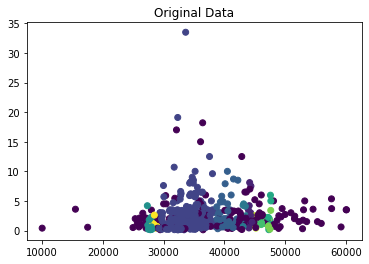

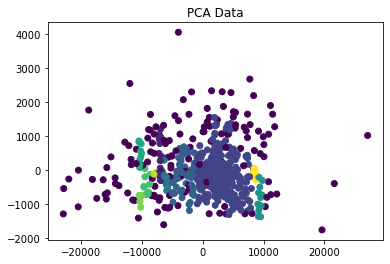

In [157]:
dbs2 = DBSCAN(eps=500, min_samples=4)
dbs2_labels = dbs2.fit_predict(D3)
print("Original Data's Number of Clusters at min_samples=4:" , max(dbs2_labels)+1)
pca2_labels = dbs2.fit_predict(pca_data2)
print("PCA Data's Number of Clusters at min_samples=4:" , max(pca2_labels)+1)

plt.scatter(D3[:,0], D3[:,1],c=dbs2_labels)
plt.title("Original Data")
plt.show()

plt.scatter(pca_data2[:,0], pca_data2[:,1],c=pca2_labels)
plt.title("PCA Data")
plt.show()

Original Data's Number of Clusters at min_samples=5: 12
PCA Data's Number of Clusters at min_samples=5: 12


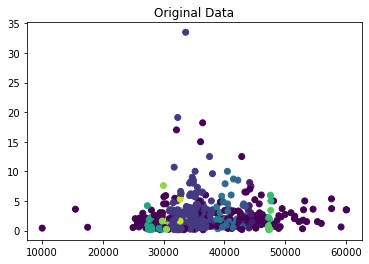

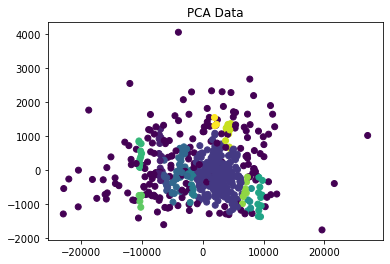

In [156]:
dbs3 = DBSCAN(eps=500, min_samples=5)
dbs3_labels = dbs3.fit_predict(D3)
print("Original Data's Number of Clusters at min_samples=5:" , max(dbs3_labels)+1)
pca3_labels = dbs3.fit_predict(pca_data2)
print("PCA Data's Number of Clusters at min_samples=5:" , max(pca3_labels)+1)

plt.scatter(D3[:,0], D3[:,1],c=dbs3_labels)
plt.title("Original Data")
plt.show()

plt.scatter(pca_data2[:,0], pca_data2[:,1],c=pca3_labels)
plt.title("PCA Data")
plt.show()

Original Data's Number of Clusters at min_samples=6: 12
PCA Data's Number of Clusters at min_samples=6: 12


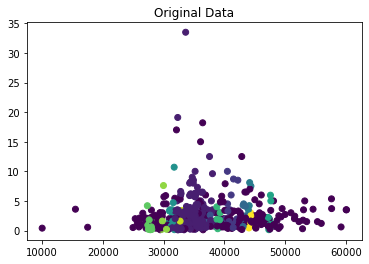

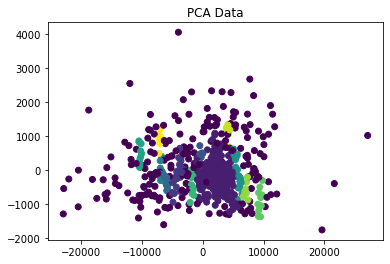

In [155]:
dbs4 = DBSCAN(eps=500, min_samples=6)
dbs4_labels = dbs4.fit_predict(D3)
print("Original Data's Number of Clusters at min_samples=6:" , max(dbs4_labels)+1)
pca4_labels = dbs4.fit_predict(pca_data2)
print("PCA Data's Number of Clusters at min_samples=6:" , max(pca4_labels)+1)

plt.scatter(D3[:,0], D3[:,1],c=dbs4_labels)
plt.title("Original Data")
plt.show()

plt.scatter(pca_data2[:,0], pca_data2[:,1],c=pca4_labels)
plt.title("PCA Data")
plt.show()

Original Data's Number of Clusters at min_samples=7: 10
PCA Data's Number of Clusters at min_samples=7: 10


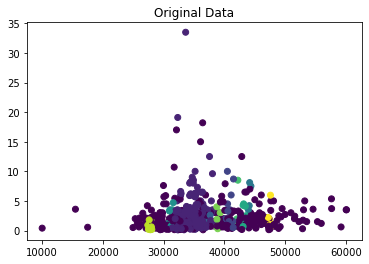

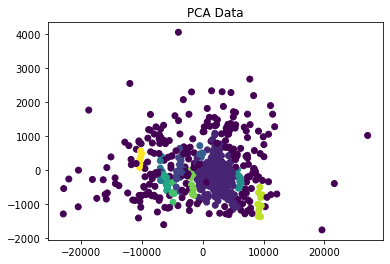

In [154]:
dbs5 = DBSCAN(eps=500, min_samples=7)
dbs5_labels = dbs5.fit_predict(D3)
print("Original Data's Number of Clusters at min_samples=7:" , max(dbs5_labels)+1)
pca5_labels = dbs5.fit_predict(pca_data2)
print("PCA Data's Number of Clusters at min_samples=7:" , max(pca5_labels)+1)

plt.scatter(D3[:,0], D3[:,1],c=dbs5_labels)
plt.title("Original Data")
plt.show()

plt.scatter(pca_data2[:,0], pca_data2[:,1],c=pca5_labels)
plt.title("PCA Data")
plt.show()

- #### Eps

Original Data's Number of Clusters at eps=7: 3
PCA Data's Number of Clusters at eps=7: 3


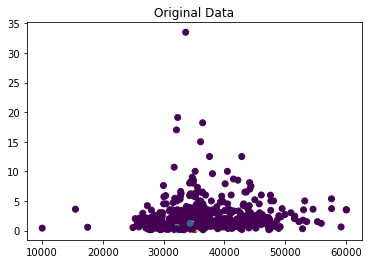

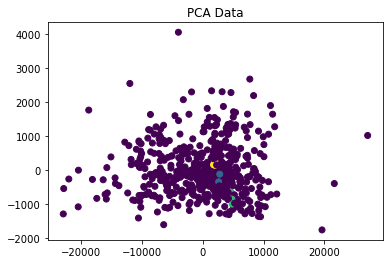

In [153]:
dbs_e1 = DBSCAN(eps=275, min_samples=5)
dbs_e1_labels = dbs_e1.fit_predict(D3)
print("Original Data's Number of Clusters at eps=7:" , max(dbs_e1_labels)+1)
pca1_e1_labels = dbs_e1.fit_predict(pca_data2)
print("PCA Data's Number of Clusters at eps=7:" , max(pca1_e1_labels)+1)
plt.scatter(D3[:,0], D3[:,1],c=dbs_e1_labels)
plt.title("Original Data")
plt.show()

plt.scatter(pca_data2[:,0], pca_data2[:,1],c=pca1_e1_labels)
plt.title("PCA Data")
plt.show()

Original Data's Number of Clusters at eps=7: 5
PCA Data's Number of Clusters at eps=7: 5


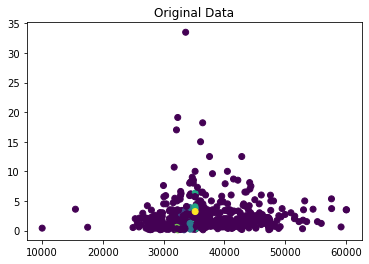

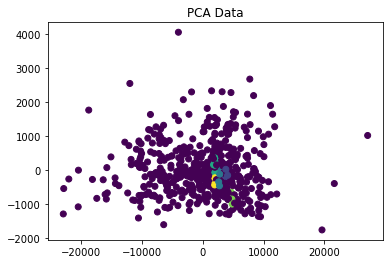

In [152]:
dbs_e2 = DBSCAN(eps=299, min_samples=5)
dbs_e2_labels = dbs_e2.fit_predict(D3)
print("Original Data's Number of Clusters at eps=7:" , max(dbs_e2_labels)+1)
pca1_e2_labels = dbs_e2.fit_predict(pca_data2)
print("PCA Data's Number of Clusters at eps=7:" , max(pca1_e2_labels)+1)

plt.scatter(D3[:,0], D3[:,1],c=dbs_e2_labels)
plt.title("Original Data")
plt.show()

plt.scatter(pca_data2[:,0], pca_data2[:,1],c=pca1_e2_labels)
plt.title("PCA Data")
plt.show()

Original Data's Number of Clusters at eps=7: 7
PCA Data's Number of Clusters at eps=7: 7


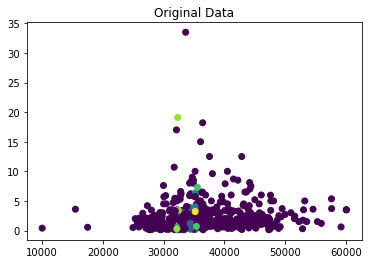

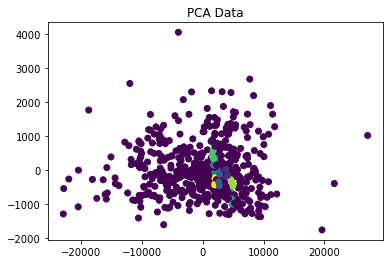

In [150]:
dbs_e3 = DBSCAN(eps=300, min_samples=5)
dbs_e3_labels = dbs_e3.fit_predict(D3)
print("Original Data's Number of Clusters at eps=7:" , max(dbs_e3_labels)+1)
pca1_e3_labels = dbs_e3.fit_predict(pca_data2)
print("PCA Data's Number of Clusters at eps=7:" , max(pca1_e3_labels)+1)

plt.scatter(D3[:,0], D3[:,1],c=dbs_e3_labels)
plt.title("Original Data")
plt.show()

plt.scatter(pca_data2[:,0], pca_data2[:,1],c=pca1_e3_labels)
plt.title("PCA Data")
plt.show()

Original Data's Number of Clusters at eps=7: 15
PCA Data's Number of Clusters at eps=7: 15


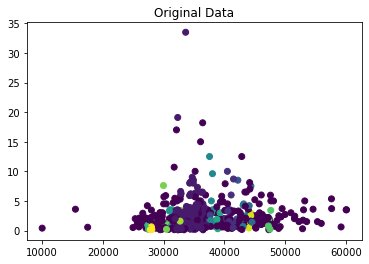

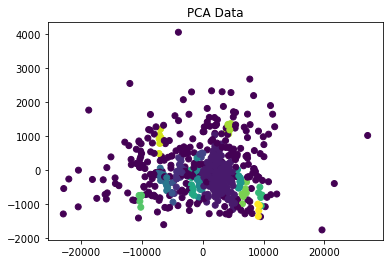

In [145]:
dbs_e4 = DBSCAN(eps=425, min_samples=5)
dbs_e4_labels = dbs_e4.fit_predict(D3)
print("Original Data's Number of Clusters at eps=7:" , max(dbs_e4_labels)+1)
pca1_e4_labels = dbs_e4.fit_predict(pca_data2)
print("PCA Data's Number of Clusters at eps=7:" , max(pca1_e4_labels)+1)

plt.scatter(D3[:,0], D3[:,1],c=dbs_e4_labels)
plt.title("Original Data")
plt.show()

plt.scatter(pca_data2[:,0], pca_data2[:,1],c=pca1_e4_labels)
plt.title("PCA Data")
plt.show()

Original Data's Number of Clusters at eps=7: 12
PCA Data's Number of Clusters at eps=7: 12


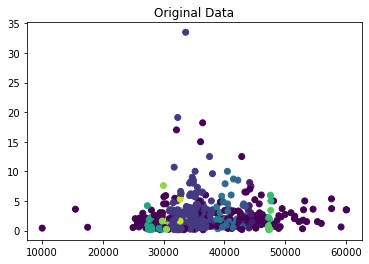

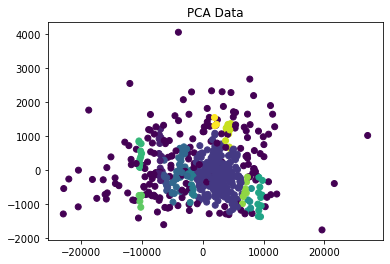

In [146]:
dbs_e5 = DBSCAN(eps=500, min_samples=5)
dbs_e5_labels = dbs_e5.fit_predict(D3)
print("Original Data's Number of Clusters at eps=7:" , max(dbs_e5_labels)+1)
pca1_e5_labels = dbs_e5.fit_predict(pca_data2)
print("PCA Data's Number of Clusters at eps=7:" , max(pca1_e5_labels)+1)

plt.scatter(D3[:,0], D3[:,1],c=dbs_e5_labels)
plt.title("Original Data")
plt.show()

plt.scatter(pca_data2[:,0], pca_data2[:,1],c=pca1_e5_labels)
plt.title("PCA Data")
plt.show()

5. (Extra credit - 3 points): Create a plot of clustering precision for each value of k used in
question 3.3, each value of $\epsilon$ used in question 3.4, and each value of minpts used in question
3.4, for both the original and reduced-dimensionality data.

Added them with 3.3 and 3.4